In [31]:
%matplotlib inline
import math
import matplotlib.pyplot as pyplot

def frange( start, stop, step ):
    yield start
    while start <= stop:
        start += step
        yield start

#https://en.wikipedia.org/wiki/NACA_airfoil#Equation_for_a_cambered_4-digit_NACA_airfoil
def camber_line( x, m, p, c ):
    if 0 <= x <= c * p:
        yc = m * (x / math.pow(p,2)) * (2 * p - (x / c))
    #elif p * c <= x <= c:
    else:
        yc = m * ((c - x) / math.pow(1-p,2)) * (1 + (x / c) - 2 * p )
    return yc

def dyc_over_dx( x, m, p, c ):
    if 0 <= x <= c * p:
        dyc_dx = ((2 * m) / math.pow(p,2)) * (p - x / c)
    #elif p * c <= x <= c:
    else:
        dyc_dx = ((2 * m ) / math.pow(1-p,2)) * (p - x / c )
    return dyc_dx

def thickness( x, t, c ):
    term1 =  0.2969 * (math.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * math.pow(x/c,2)
    term4 =  0.2843 * math.pow(x/c,3)
    term5 = -0.1015 * math.pow(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

def naca4( m, p, t, c=1 ):
    for x in frange( 0, 1.0, 0.01 ):
        dyc_dx = dyc_over_dx( x, m, p, c )
        th = math.atan( dyc_dx )
        yt = thickness( x, t, c )
        yc = camber_line( x, m, p, c )
        xu = x  - yt * math.sin(th)
        xl = x  + yt * math.sin(th)
        yu = yc + yt * math.cos(th)
        yl = yc - yt * math.cos(th)
        yield (xu, yu), (xl, yl)

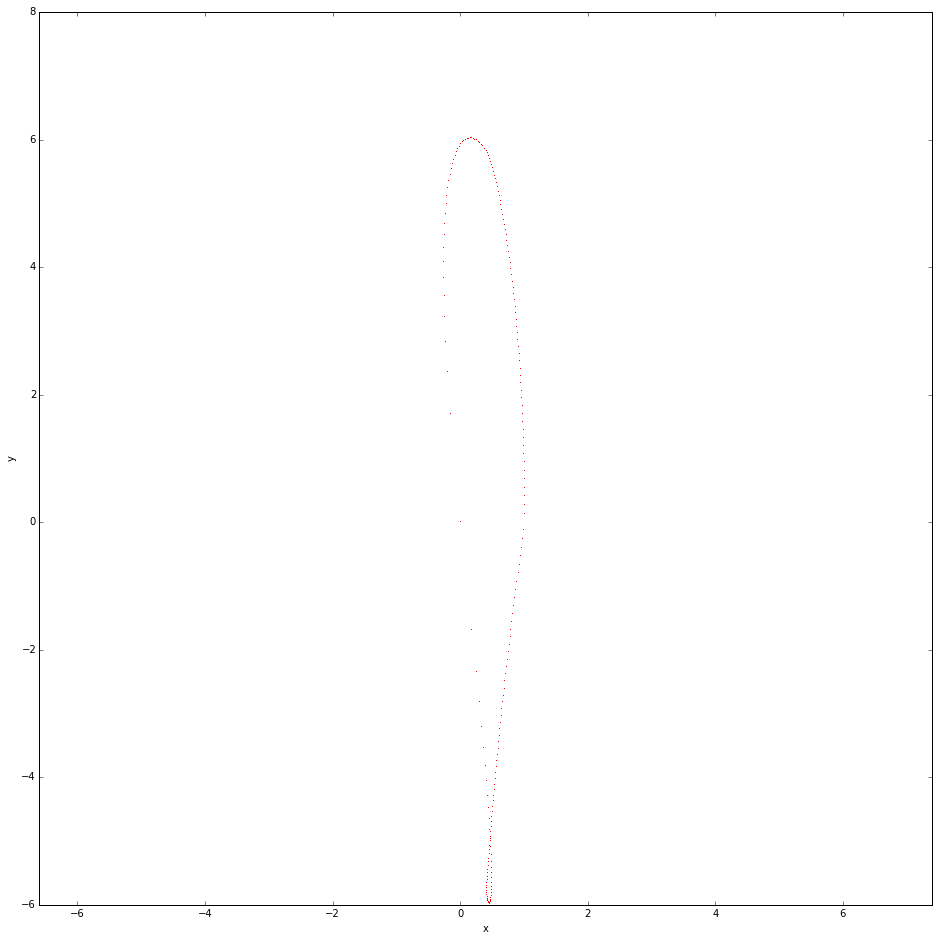

In [32]:
#naca2412 
m = 0.02
p = 0.4
t = 12

naca4points = naca4( m, p, t )
for (xu,yu),(xl,yl) in naca4points:
    pyplot.plot( xu, yu, 'r,')
    pyplot.plot( xl, yl, 'r,')
pyplot.ylabel('y')
pyplot.xlabel('x')
pyplot.axis('equal')
figure = pyplot.gcf()
figure.set_size_inches(16,16,forward=True)    